<a href="https://colab.research.google.com/github/opi-lab/optical-metrology-2021/blob/gh-pages/notebooks/wlsi_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## White light scanning interferece microscopy

Andres Marrugo, PhD      
Universidad Tecnológica de Bolívar

In this activity, we will estimate the 3D surface of a metallic sphere using White Light Scanning Interference Microscopy (WLSI), also called Coherence Scanning Interference (CSI) Microscopy.

In [1]:
# Let's load the necessary libraries
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

We need first to download the dataset for this example.

Let's download the images from the course repository. The code that follows is an [svn trick](https://stackoverflow.com/questions/7106012/download-a-single-folder-or-directory-from-a-github-repo) for downloading a folder from a Github repository.

In [2]:
!apt install subversion
!svn checkout https://github.com/opi-lab/optical-metrology-2021/trunk/data/wlsi-series

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 subversion
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,237 kB of archives.
After this operation, 9,910 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libserf-1-1 amd64 1.3.9-6 [44.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libsvn1 amd64 1.9.7-4ubuntu1 [1,183 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 subversion amd64 1.9.7-4ubuntu1 

We need first the dataset of images for reconstruction. We will store all the image filenames in a list.

In [3]:
imlist = sorted(glob.glob('wlsi-series/*'))
N = len(imlist)

print('There are {} images'.format(N))

There are 181 images



Read a couple of images.

In [6]:
# Read two images from different positions

ind1 = 0
ind2 = 135

im1 = cv2.imread(imlist[ind1], 0)
im2 = cv2.imread(imlist[ind2], 0)

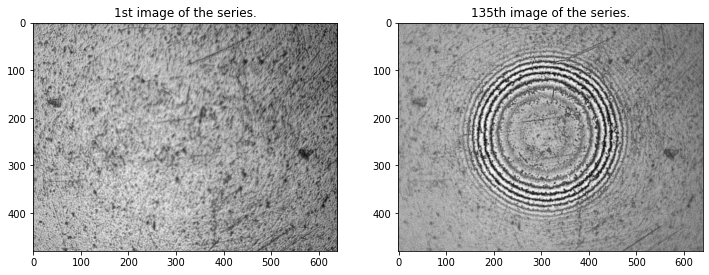

In [7]:
# Let's plot the two images

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(im1, cmap='gray'), ax[0].set_title('1st image of the series.')
ax[1].imshow(im2, cmap='gray'), ax[1].set_title('{}th image of the series.'.format(ind2))
plt.show()

Note that not all images have fringes. The depth scan covers a larger range than the shape of the object. As in the following figure.

![](https://github.com/opi-lab/optical-metrology-2021/raw/gh-pages/figures/depth-scan-wlsi.png)

In [9]:
# Let's read all images and store them in a numpy array

wlsi_data = []
for f in imlist:
    # print(f)
    image = cv2.imread(f, 0)
    wlsi_data.append(image)

wlsi_data = np.array(wlsi_data)
print('X_data shape:', wlsi_data.shape)


X_data shape: (181, 480, 640)


Note that for indexing any of the images you must use the first axis ``wlsi_data[1st axis, 2nd axis, 3rd axis]``.

We will plot the depth interferogram at a given pixel (x, y). Also note that the depth scan was performed with 0.1 microns steps. 

The max value is located at index 137
The max value is located at depth z = 13.78 microns


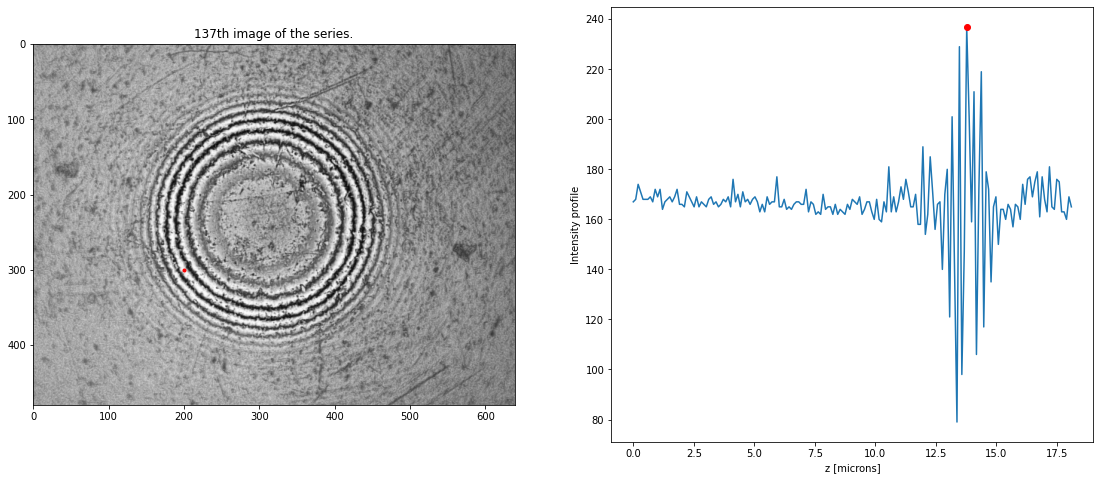

In [17]:
# Let's get the depth interferogram

# we get size of the array
n, h, w = wlsi_data.shape

# We have to analyze at a given point (x, y)
x = 200
y = 300

# The z-axis goes from 0 to n*0.1 microns
z_axis = np.linspace(0, n*0.1, n)

# Get the maximum value of the depth intereference pattern
ind = np.argmax(wlsi_data[:, y, x])
# Note that there are other methods for getting the envelope maximum
# or the centroid

print('The max value is located at index {}'.format(ind))
print('The max value is located at depth z = {:2.2f} microns'.format(z_axis[ind]))

# Plot the image and the intensity profile
fig, ax = plt.subplots(1,2, figsize=(19,8))
ax[0].imshow(wlsi_data[ind, :, :], cmap='gray')
ax[0].set_title('{}th image of the series.'.format(ind))
ax[0].plot(x, y, 'r.')

ax[1].plot(z_axis, wlsi_data[:, y, x])
ax[1].plot(z_axis[ind], wlsi_data[ind, y, x], 'or')
ax[1].set_xlabel('z [microns]')
ax[1].set_ylabel('Intensity profile')
plt.show()

## TODO

You should use the stack of images and process them to obtain a 3D surface.

*   Modify the notebook and add comments to everything you do. Explain your reasoning behind your implementation.
*   Plot in 3D the surface and determine any problems with your implementation and propose how to solve them.
*   You may get a spiky 3D surface. Try to improve it by filtering or using a more robust WLSI method.





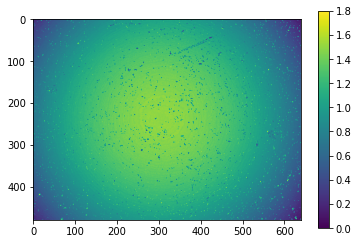

In [20]:
# Let's obtain the surface

# YOUR CODE HERE 
# Store the 3D surface in the variable: depth_map 

# We can visualize the depth_map as an image
plt.imshow(depth_map)
plt.colorbar()
plt.show()

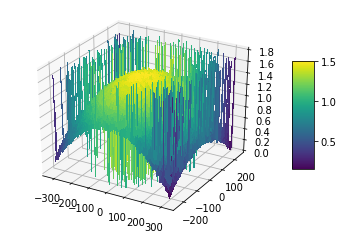

In [21]:
# We can plot as a 3D surface

from matplotlib import cm
from matplotlib.ticker import LinearLocator
# import numpy as np

X = np.linspace(-w/2, w/2, w)
Y = np.linspace(-h/2, h/2, h)
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, depth_map, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

# ax.view_init(30, 20) # Point of view for a better visualization

# Customize the z axis.
# ax.set_zlim(0, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

You should get something similar to the above figure. However, it has many spikes. Try to filter it or implement a more robust method.

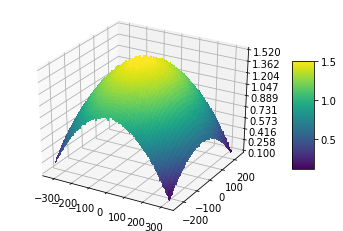

In [23]:
# BONUS
# Implement a filtering scheme to produce something
# like the following figure.
# 
# Store your filtered surface in the variable: depth_map_filtered


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, depth_map_filtered, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

# ax.view_init(30, 20) # Point of view for a better visualization

# Customize the z axis.
# ax.set_zlim(0, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
